# Salaries EDA
## By Noe Lozano Mendoza
### In this report we are going to do a basic Exploratory Data Analysis to a data set about the salaries of Data Science related employees around the world. 

First we are going to prepare our data into a pandas dataframe for its manipulation.

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv("https://salaries.ai-jobs.net/download/salaries.csv")

In [ ]:
df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2021e,SE,FT,Machine Learning Engineer,70000,EUR,83327,BE,50,BE,M
1,2020,MI,FT,Data Engineering Manager,51999,EUR,59303,DE,100,DE,S
2,2021e,MI,FT,Research Scientist,53000,EUR,63090,FR,50,FR,M
3,2021e,MI,FT,Data Engineer,60000,GBP,82917,GB,100,GB,L
4,2021e,MI,FT,Data Architect,170000,USD,170000,US,100,US,L
...,...,...,...,...,...,...,...,...,...,...,...
251,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
252,2021e,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
253,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
254,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L


With the dataframe stored, now we can start to examine each of the most representatives columns in tha data frame, first with non-graphical solutions and then with graphical solutions.

The columns we are going to observe are:


*   Salary in USD
*   Remote Ratio
*   Company Size
*   Employment Type

In that specific order






In [ ]:
salaryUSD = df['salary_in_usd']

In [ ]:
salaryUSD

0       83327
1       59303
2       63090
3       82917
4      170000
        ...  
251    412000
252    151000
253    105000
254    100000
255     94887
Name: salary_in_usd, Length: 256, dtype: int64

In [ ]:
np.min(salaryUSD)

2874

In [ ]:
np.max(salaryUSD)

600000

Just by checking the minimum and maximum of the USD salaries, we can see that we have clear outliers. Where 11 dollar the year is completely unrealistic. In fact, this outlier will affect drastically the mean and standard deviation. Let's see the result of them:

In [ ]:
np.mean(salaryUSD)

100221.9375

In [ ]:
np.std(salaryUSD, ddof=1)

83054.60940725781

Event though the mean has a relatively normal result, the standard deviation (considering it is a sample) is bigger than anything we could expect. Let's see how them graphed on a distributi and in a boxplot.

(For this, we are going to use de matplotlib module)

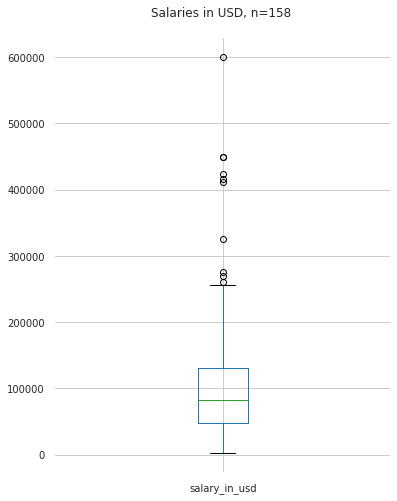

In [ ]:
import matplotlib.pyplot as plt
df.boxplot(column='salary_in_usd', figsize=(6,8))
plt.title('Salaries in USD, n=158 \n');

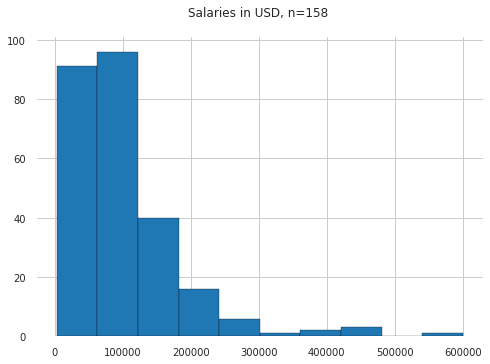

In [ ]:
df.hist(column='salary_in_usd', edgecolor='black')
plt.title('Salaries in USD, n=158 \n');


As you can see the plots are very skewed to the right. In fact, the boxplot show us that there are a lot of outliers. Which means our data should be cleaned or adjusted. Now let's analyze the remote ratio.

In [ ]:
remoteRatio = df['remote_ratio']

In [ ]:
remoteRatio

0       50
1      100
2       50
3      100
4      100
      ... 
251    100
252    100
253    100
254    100
255     50
Name: remote_ratio, Length: 256, dtype: int64

In [ ]:
from statistics import mode
mode(remoteRatio)

100

In [ ]:
np.mean(remoteRatio)

69.3359375

Taking into account that people who introduced 0 as non remote work, 50 as partial remote work and 100 as fully remote work. We can see that the majority of Data Science employees works remotely or partially remotely. Being the mode fully remote and the mean over 50, which automatically tells us that in the whole sample remote work is predominant.

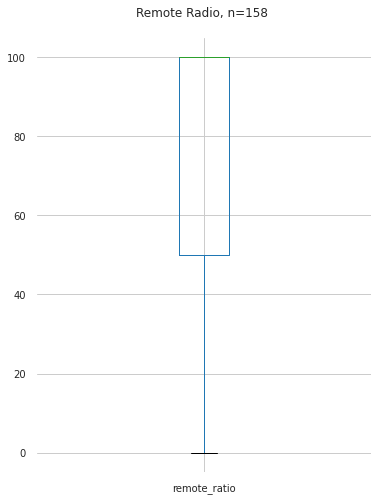

In [ ]:
df.boxplot(column='remote_ratio', figsize=(6,8))
plt.title('Remote Radio, n=158 \n');

The boxplot confirms our assumption of a majority working mostly remotely. Now let's analyze the companies's size.

In [ ]:
companySize = df['company_size'].value_counts()

In [ ]:
companySize

L    138
S     60
M     58
Name: company_size, dtype: int64

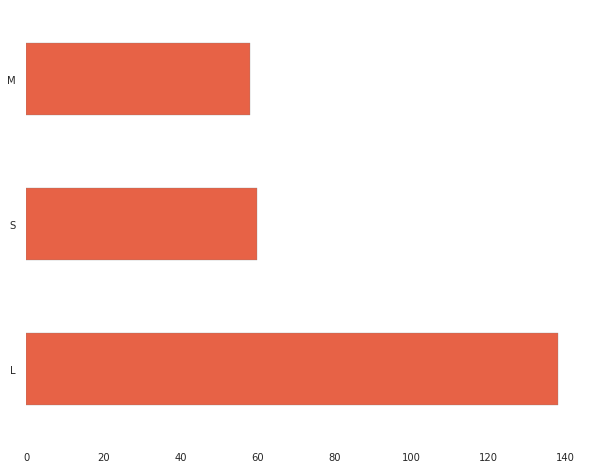

In [ ]:
companySize.plot.barh(figsize=(10,8), color='#E76246', edgecolor='gray');

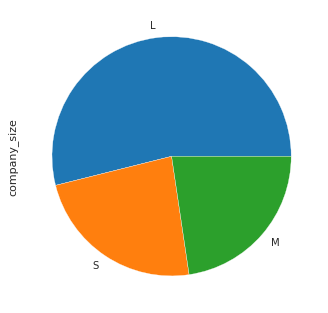

In [ ]:
companySize.plot.pie();

As we can see, the majority of the employees that work at Data Science Jobs are working in large companies, then small companies and finally medium companies. Which may be related to the amouunt of data they work with or how flexible they are. Lets see the employment_type.


In [ ]:
employmentType = df['employment_type'].value_counts()

In [ ]:
employmentType

FT    242
PT      7
CT      4
FL      3
Name: employment_type, dtype: int64

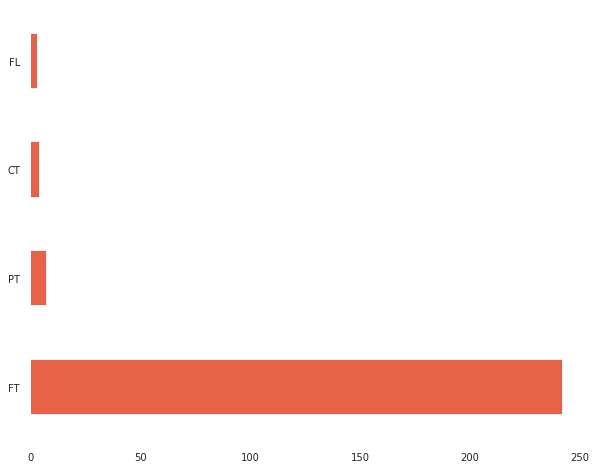

In [ ]:
employmentType.plot.barh(figsize=(10,8), color='#E76246', edgecolor='gray');

It is clear that Data Science jobs are mainly full time and very few people work as part-time, contract or freelance.

Now we are going to analyze multivariable data. In this case, we are going to use the same representative data.




In [ ]:
representativeDf = df.drop(['work_year','experience_level','job_title','salary','employee_residence','company_location','salary_currency'], axis=1)

In [ ]:
#This is going to be the new and fixed data frame.
representativeDf

,employment_type,salary_in_usd,remote_ratio,company_size
0,FT,83327,50,M
1,FT,59303,100,S
2,FT,63090,50,M
3,FT,82917,100,L
4,FT,170000,100,L
...,...,...,...,...
251,FT,412000,100,L
252,FT,151000,100,L
253,FT,105000,100,S
254,CT,100000,100,L


In [ ]:
pip install pandas-profiling==2.7.1

In [ ]:
from pandas_profiling import ProfileReport
profile = ProfileReport(representativeDf)
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/16 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In the previous report we can see that the dataframe is complete, and there is no information missing.

Now we can graph scatterplots to see if there is any relationship between columns.

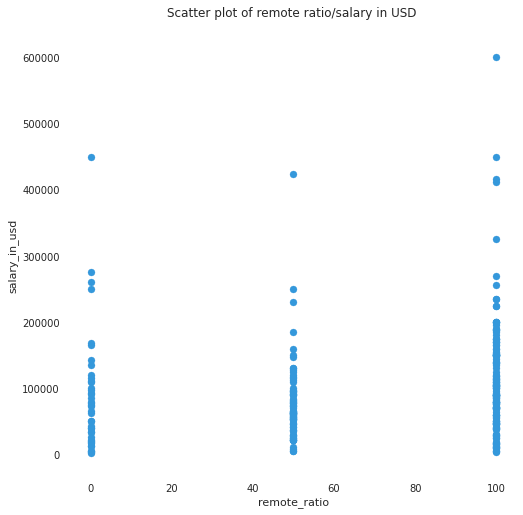

In [ ]:
plt.figure(figsize=(8,8))
plt.scatter(representativeDf['remote_ratio'], representativeDf['salary_in_usd'], color='#3498db') 
plt.title('Scatter plot of remote ratio/salary in USD \n')
plt.xlabel('remote_ratio')
plt.ylabel('salary_in_usd');

Because we only have 3 parameters given for remote ratio (0,50,100) our scatterplot has a very peculiar result, however we can noticed some interesting things. Mainly, we can realize that those employees who tend to work full remotely are earning more money than the ones who are working partially remote or not remote. 

The link to this colab is the following: https://colab.research.google.com/drive/13u4_-cDteUasO5Tg_kJrtuWNH5Jdk27A?usp=sharing